# Is there a seasonality in the prices of properties llisted in AirBnb-Berlin?

In [1]:
#Special highlight
#pip install holidays

In [2]:
#import initial libraries

import pandas as pd
import numpy as np
import re

In [3]:
#import file
dataFrameCalendar=pd.read_csv("D:/Raghvendra/Masters/Irish Applications/DCU/DCU subjects study/Sem2_CA683 data analytics and data mining\Main Assignment/berlin airbnb 2020/calendar_summary.csv")

In [4]:
dataFrameCalendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,355227,2020-02-19,f,$60.00,$60.00,45.0,400.0
1,267951,2020-02-18,f,$60.00,$60.00,2.0,300.0
2,267951,2020-02-19,f,$60.00,$60.00,2.0,300.0
3,267951,2020-02-20,f,$65.00,$65.00,2.0,300.0
4,267951,2020-02-21,f,$65.00,$65.00,2.0,300.0


In [5]:
dataFrameCalendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
9197063,42361801,2021-02-12,t,$46.00,$46.00,3.0,1125.0
9197064,42361801,2021-02-13,t,$46.00,$46.00,3.0,1125.0
9197065,42361801,2021-02-14,t,$46.00,$46.00,3.0,1125.0
9197066,42361801,2021-02-15,t,$46.00,$46.00,3.0,1125.0
9197067,42361801,2021-02-16,t,$46.00,$46.00,3.0,1125.0


In [6]:
dataFrameCalendar.shape

(9197068, 7)

In [7]:
dataFrameCalendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    3
maximum_nights    3
dtype: int64

In [8]:
dataFrameCalendar.notnull().sum()

listing_id        9197068
date              9197068
available         9197068
price             9197068
adjusted_price    9197068
minimum_nights    9197065
maximum_nights    9197065
dtype: int64

In [9]:
#dataFrameCalendar['price'].mean()

#######calculated as $79.79

In [10]:
#dataFrameCalendar['price'].median()

### calculated as $50.00

In [11]:
#replacing NaN values with 0/mean/mode - check with all three
dataFrameCalendar.fillna('$80.00', inplace=True)
dataFrameCalendar = dataFrameCalendar[dataFrameCalendar.price != 0]

In [12]:
#Extracting prices from the table
price = dataFrameCalendar['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
dataFrameCalendar['price']=prices

dataFrameCalendar = dataFrameCalendar[dataFrameCalendar.price >= 0]

In [13]:
dataFrameCalendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,355227,2020-02-19,f,60.0,$60.00,45,400
1,267951,2020-02-18,f,60.0,$60.00,2,300
2,267951,2020-02-19,f,60.0,$60.00,2,300
3,267951,2020-02-20,f,65.0,$65.00,2,300
4,267951,2020-02-21,f,65.0,$65.00,2,300


In [14]:
#separating date column into day month and year
dataFrameCalendar['Year'],dataFrameCalendar['Month'],dataFrameCalendar['Day']=dataFrameCalendar['date'].str.split('-',2).str
dataFrameCalendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Day
0,355227,2020-02-19,f,60.0,$60.00,45,400,2020,02,19
1,267951,2020-02-18,f,60.0,$60.00,2,300,2020,02,18
2,267951,2020-02-19,f,60.0,$60.00,2,300,2020,02,19
3,267951,2020-02-20,f,65.0,$65.00,2,300,2020,02,20
4,267951,2020-02-21,f,65.0,$65.00,2,300,2020,02,21


In [15]:
dataFrameYear=dataFrameCalendar.groupby(['Year','Month']).price.mean()
dataFrameYear=dataFrameYear.reset_index()
dataFrameYear=dataFrameYear.rename(columns={'price':'average_Price'})
dataFrameYear['year-Month']=dataFrameYear['Year'].map(str) + "-" + dataFrameYear['Month'].map(str)
dataFrameYear.to_csv('year_month_data.csv')
dataFrameYear.head(2)

,Year,Month,average_Price,year-Month
0,2020,02,78.065477,2020-02
1,2020,03,75.953871,2020-03


Text(0, 0.5, 'Average of Price')

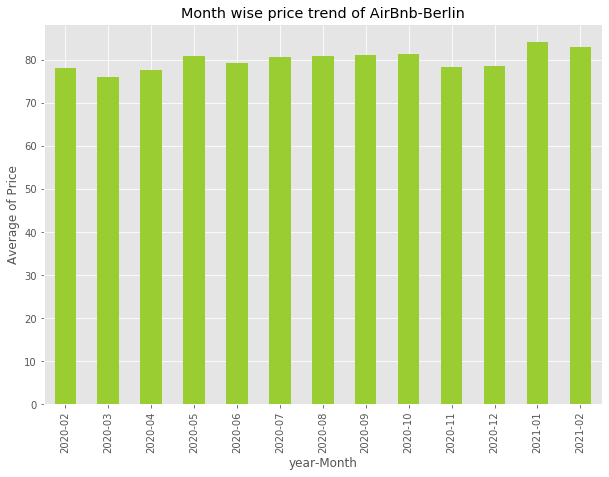

In [16]:
# visualizing the trend of year/Month and average prices of the listing

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = dataFrameYear['year-Month']
y_pos = dataFrameYear['average_Price']

#https://matplotlib.org/gallery/color/named_colors.html

dataFrameYear.plot(kind='bar', x='year-Month', y='average_Price', color = 'yellowgreen', figsize =(10,7), 
           title = 'Month wise price trend of AirBnb-Berlin', 
           legend = False)

plt.ylabel('Average of Price')

#https://towardsdatascience.com/5-minute-guide-to-detecting-holidays-in-python-c270f8479387

https://pypi.org/project/holidays/

In [17]:
#getting day name from date data and holidays

from datetime import date
import datetime
import calendar
import holidays

dataFrameCalendar.fillna(0, inplace=True)

#https://pypi.org/project/holidays/
german_holidays = holidays.Germany()

dataFrameCalendar['day_Name']='default'
dataFrameCalendar['holiday']='False'
dataFrameCalendar['german_holiday_names']='working'
for index,row in dataFrameCalendar.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in german_holidays
    dataFrameCalendar.set_value(index,'day_Name',calendar.day_name[sdate.weekday()])
    dataFrameCalendar.set_value(index,'holiday',vall)
    dataFrameCalendar.set_value(index,'german_holiday_names',german_holidays.get(sdate))
#calendarDF.to_csv('holidays_data.csv')
dataFrameCalendar.head()

C:\Users\Raghvendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Raghvendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Raghvendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Day,day_Name,holiday,german_holiday_names
0,355227,2020-02-19,f,60.0,$60.00,45,400,2020,02,19,Wednesday,False,None
1,267951,2020-02-18,f,60.0,$60.00,2,300,2020,02,18,Tuesday,False,None
2,267951,2020-02-19,f,60.0,$60.00,2,300,2020,02,19,Wednesday,False,None
3,267951,2020-02-20,f,65.0,$65.00,2,300,2020,02,20,Thursday,False,None
4,267951,2020-02-21,f,65.0,$65.00,2,300,2020,02,21,Friday,False,None


In [18]:
#calculating Average price for each day

dataFrameDay=dataFrameCalendar.groupby('day_Name').price.mean()
dataFrameDay=dataFrameDay.reset_index()
dataFrameDay['day_num']=0

for index,row in dataFrameDay.iterrows():
    if row['day_Name']=='Monday':
        dataFrameDay.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        dataFrameDay.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        dataFrameDay.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        dataFrameDay.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        dataFrameDay.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        dataFrameDay.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        dataFrameDay.set_value(index,'day_num',7)
dataFrameDay=dataFrameDay.sort_values('day_num',ascending=[1])
dataFrameDay=dataFrameDay.rename(columns={'price':'Average_Price'})
dataFrameDay

C:\Users\Raghvendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Raghvendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\Raghvendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Raghvendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Raghvendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .i

,day_Name,Average_Price,day_num
1,Monday,69.291058,1
5,Tuesday,69.331959,2
6,Wednesday,69.268131,3
4,Thursday,69.559435,4
0,Friday,106.562470,5
2,Saturday,106.583259,6
3,Sunday,69.265595,7


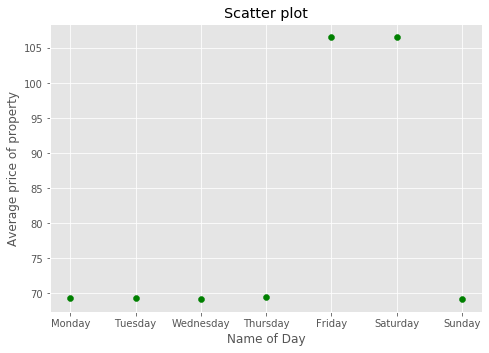

In [20]:
#https://www.tutorialspoint.com/matplotlib/matplotlib_scatter_plot.htm

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(dataFrameDay["day_Name"], dataFrameDay["Average_Price"], color='green')
ax.set_xlabel('Name of Day')
ax.set_ylabel('Average price of property')
ax.set_title('Scatter plot')
plt.show()

In [21]:
#checking which holiday has maximum listings

dataFrameHoliday=dataFrameCalendar.groupby('german_holiday_names').listing_id.count()
dataFrameHoliday=dataFrameHoliday.reset_index()
dataFrameHoliday=dataFrameHoliday.sort_values('listing_id',ascending=[0])
dataFrameHoliday

,german_holiday_names,listing_id
0,Christi Himmelfahrt,25197
1,Erster Mai,25197
2,Erster Weihnachtstag,25197
3,Karfreitag,25197
4,Neujahr,25197
5,Ostermontag,25197
6,Pfingstmontag,25197
7,Tag der Deutschen Einheit,25197
8,Zweiter Weihnachtstag,25197


[Text(0, 0.5, 'Overall listings'), Text(0.5, 0, 'German holiday names')]

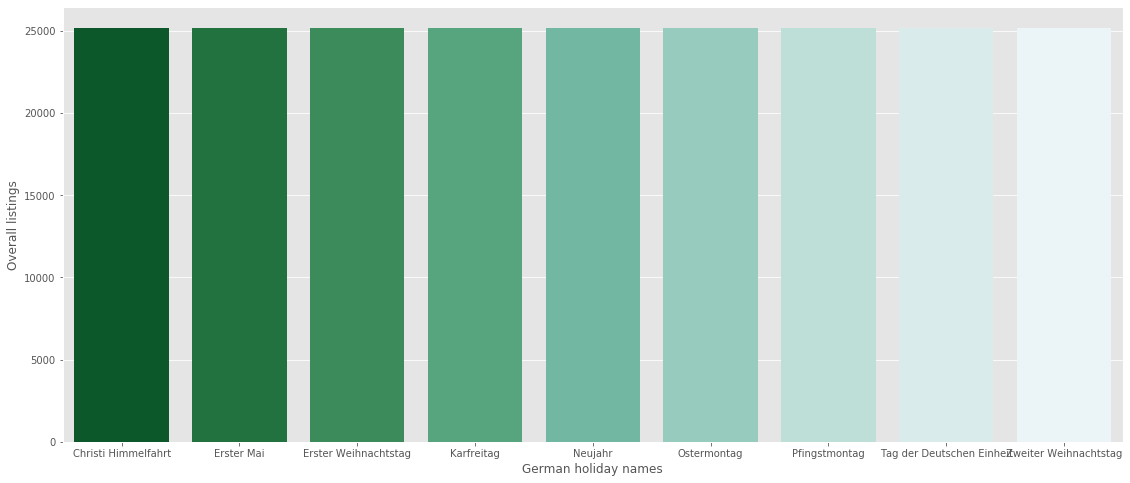

In [22]:
# visualizing

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))

#https://seaborn.pydata.org/tutorial/color_palettes.html

ax = sns.barplot("german_holiday_names", y="listing_id", data=dataFrameHoliday,palette="BuGn_r")
ax.set(xlabel='German holiday names', ylabel='Overall listings')

In [23]:
DataFrameHolidayPrice=dataFrameCalendar.groupby('german_holiday_names').price.mean()
DataFrameHolidayPrice=DataFrameHolidayPrice.reset_index()
DataFrameHolidayPrice=DataFrameHolidayPrice.sort_values('price',ascending=[0])

DataFrameHolidayPrice.head(3)

,german_holiday_names,price
4,Neujahr,111.014446
7,Tag der Deutschen Einheit,106.432194
1,Erster Mai,106.284875


[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'German holiday names')]

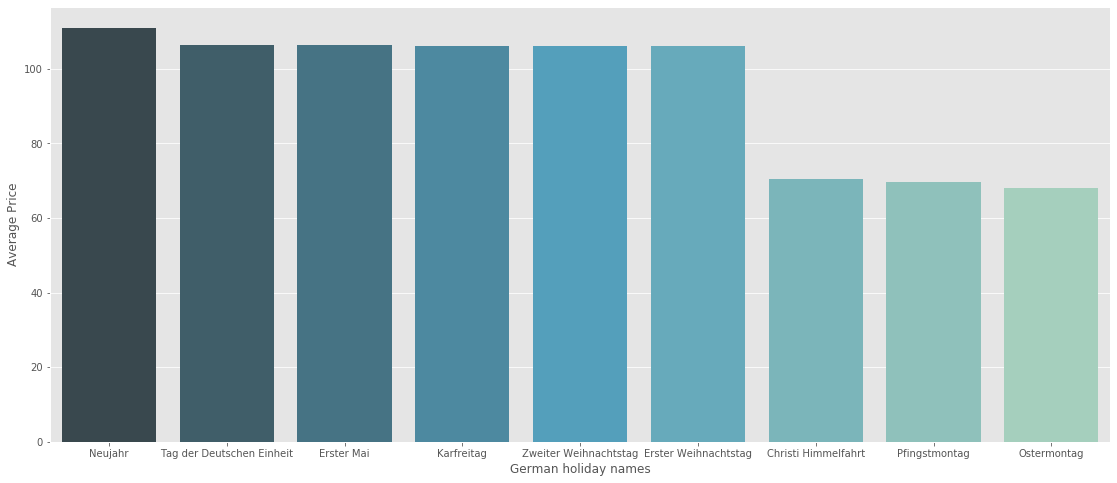

In [24]:
# visualizing

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))

#https://seaborn.pydata.org/tutorial/color_palettes.html

ax = sns.barplot("german_holiday_names", y="price", data=DataFrameHolidayPrice,palette="GnBu_d")
ax.set(xlabel='German holiday names', ylabel='Average Price')

In [25]:
DataFrameMerged=pd.merge(dataFrameHoliday,DataFrameHolidayPrice,on='german_holiday_names')
DataFrameMerged=DataFrameMerged.rename(columns={'listing_id':'number_Of_Listings'})
DataFrameMerged=DataFrameMerged.rename(columns={'price':'average_Price'})
DataFrameMerged

,german_holiday_names,number_Of_Listings,average_Price
0,Christi Himmelfahrt,25197,70.379251
1,Erster Mai,25197,106.284875
2,Erster Weihnachtstag,25197,106.152161
3,Karfreitag,25197,106.189784
4,Neujahr,25197,111.014446
5,Ostermontag,25197,68.108307
6,Pfingstmontag,25197,69.642656
7,Tag der Deutschen Einheit,25197,106.432194
8,Zweiter Weihnachtstag,25197,106.181331


We can see that the prices in January and February 2021 are higher. Let us check

In [26]:
#analyzing data of January and February

DataFrameCheckHolidays=dataFrameCalendar[(dataFrameCalendar['Year'] == '2021') & ((dataFrameCalendar['Month'] == '01') |(dataFrameCalendar['Month'] == '02'))]
DataFrameCheckHolidays=DataFrameCheckHolidays.groupby(['Year','Month','holiday']).price.mean()
DataFrameCheckHolidays=DataFrameCheckHolidays.reset_index()
DataFrameCheckHolidays.head()

,Year,Month,holiday,price
0,2021,01,False,83.281311
1,2021,01,True,111.014446
2,2021,02,False,82.988975


In [27]:
#analyzing longweekednd holiday days

columbusDF=dataFrameCalendar[(dataFrameCalendar['Year'] == '2021') & (dataFrameCalendar['Month'] == '01' ) & ((dataFrameCalendar['Day'] == '01') | (dataFrameCalendar['Day'] == '02') | (dataFrameCalendar['Day'] == '03'))]
columbusDF.groupby('Month').price.mean()

Month
01    97.027252
Name: price, dtype: float64

In [28]:
#analyzing rest of the days

NocolumbusDF=dataFrameCalendar[(dataFrameCalendar['Year'] == '2021') & (dataFrameCalendar['Month'] == '01' ) & ((dataFrameCalendar['Day'] != '01') | (dataFrameCalendar['Day'] != '02') | (dataFrameCalendar['Day'] != '03'))]
NocolumbusDF.groupby('Month').price.mean()

Month
01    84.175929
Name: price, dtype: float64

In [29]:
# analyzing data from date 1st of January to date 10th of January which includes both long weekend and normal workdays

janDF=dataFrameCalendar[(dataFrameCalendar['Year'] == '2021') & (dataFrameCalendar['Month'] == '01' )& ((dataFrameCalendar['Day'] == '01' )| (dataFrameCalendar['Day'] == '02' )| (dataFrameCalendar['Day'] == '03' )| (dataFrameCalendar['Day'] == '04' )| (dataFrameCalendar['Day'] == '05' )| (dataFrameCalendar['Day'] == '06' )| (dataFrameCalendar['Day'] == '07' )| (dataFrameCalendar['Day'] == '08' )| (dataFrameCalendar['Day'] == '09' )| (dataFrameCalendar['Day'] == '10' ))]
janDF=janDF.groupby('Day').price.mean()
janDF=janDF.reset_index()
janDF=janDF.sort_values('Day',ascending=[1])
janDF=janDF.rename(columns={'price':'Average_Price'})
janDF.head(10)

,Day,Average_Price
0,01,111.014446
1,02,108.735008
2,03,71.332301
3,04,72.398460
4,05,72.665000
5,06,72.642180
6,07,71.390364
7,08,109.489423
8,09,109.492162
9,10,71.139064


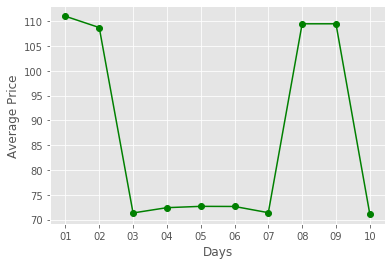

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x=janDF['Day'].tolist()
y=janDF['Average_Price'].tolist()

plt.plot(x,y, 'go-')
plt.ylabel('Average Price')
plt.xlabel('Days')
plt.show()